In [2]:
import numpy as np
import pandas as pd


df = pd.DataFrame(np.random.randint(0,100,size=(15, 4)), columns=list('ABCD'))
corr=df.corr()
corr



,A,B,C,D
A,1.000000,-0.186405,0.049183,-0.011056
B,-0.186405,1.000000,0.414337,0.218976
C,0.049183,0.414337,1.000000,0.295386
D,-0.011056,0.218976,0.295386,1.000000


In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('HouseData.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [17]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [54]:
df.columns
df['SalePrice']
df.SalePrice


0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [55]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

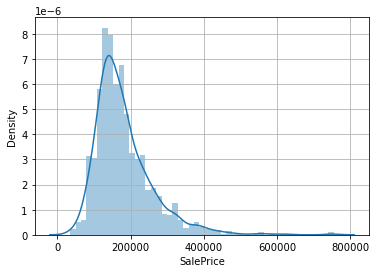

In [34]:
sns.distplot(df['SalePrice'])
plt.grid()

# Insights for the above graph
1.It is a left skewed normal distribution for saleprice variable which showcases the possibilty of an outlier
2.Most of the values are concentrated between 1lakh to 2lakh
3.has an outlier. also from the 5 number summary we understand that mean is higher than median,and hence ouliers exist

y axis shows the percentage of count/occurence of that DataPoint

<AxesSubplot:xlabel='SalePrice'>

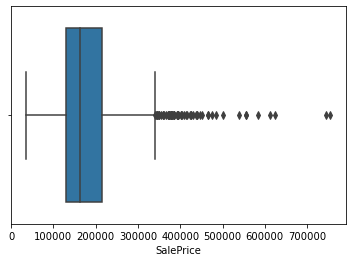

In [41]:
#Treating outliers
sns.boxplot(data=df['SalePrice'],x=df['SalePrice'])

# Treating outliers: Just taking the box data

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<AxesSubplot:>

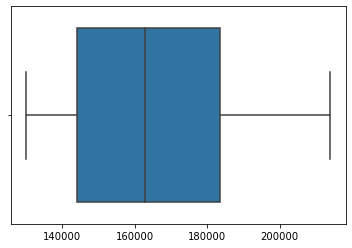

In [116]:
lst=[]
a=df['SalePrice'].describe()
print(a)
for i in df['SalePrice']:
    if (i >= a['25%'] and i <= a['75%']):
        lst.append(i)
        #print(lst)
df_box=pd.DataFrame(lst)

sns.boxplot(data=df_box,x=lst)


In [88]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

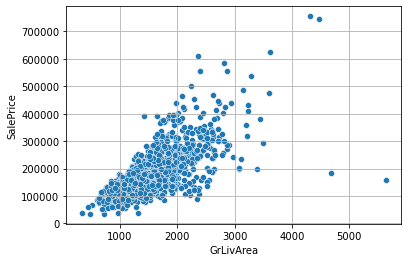

In [108]:
#data=pd.concat([df['SalePrice'],df['GrLivArea']],axis=1)
#data.plot.scatter(x='GrLivArea',y='SalePrice',ylim=(0,800000))
fig, ax = plt.subplots()
sns.scatterplot(x='GrLivArea',y='SalePrice',data=df)
#ax.set_ylim=(0,800000)
plt.grid()
plt.show()



# Insights
1.Linear relationship between Greater living area and Salesprice exist
2.There are ouliers

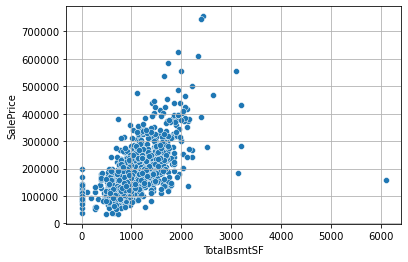

In [121]:
sns.scatterplot(x='TotalBsmtSF',y='SalePrice',data=df)
plt.grid()

# Insights
1.linear relationship and outliers exist

2.when total bsmnt sqft=0,the salesprice increases which is a biaseness in the data

   Depending on the percentage of data whihc has got O values:
   
      if it is 5-10% of data then,these 0 values can be replaced by mean/medianor can delete those rows
      if it is more than 75 or 80% of data then remove the column

In [124]:
data=pd.concat([df['SalePrice'],df['TotalBsmtSF']],axis=1)
data

,SalePrice,TotalBsmtSF
0,208500,856
1,181500,1262
2,223500,920
3,140000,756
4,250000,1145
...,...,...
1455,175000,953
1456,210000,1542
1457,266500,1152
1458,142125,1078


<AxesSubplot:xlabel='TotalBsmtSF'>

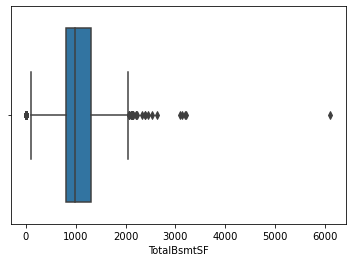

In [125]:
sns.boxplot(data=df['TotalBsmtSF'],x=df['TotalBsmtSF'])

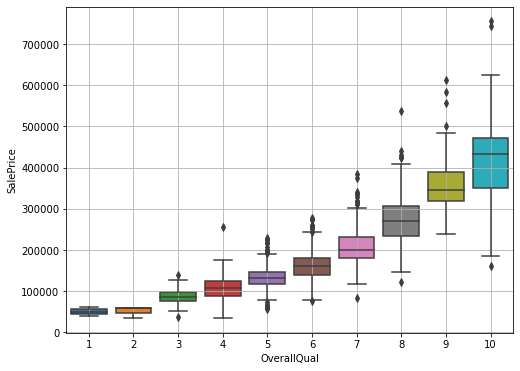

In [147]:
f,ax=plt.subplots(figsize=(8,6))
fig=sns.boxplot(x='OverallQual',y='SalePrice',data=df)
#fig.axis(ymin=0,ymax=80000)
#plt.xticks(np.arange(min(df['SalePrice']), max(df['SalePrice']+1), 10000))
plt.grid()

# Insights
1.Relationship between catgorical values
2.The quality 10 houses are of  the best quality houses because we see that it is of higher saleprice
3.a realeastate broker can show the houses according to the budget flat shes looking for


In [ ]:
corrmat=df.corr()
corrmat
#10 rows which has the largest SP in corrmat
corrmat.nlargest(10,'SalePrice').index



<AxesSubplot:>

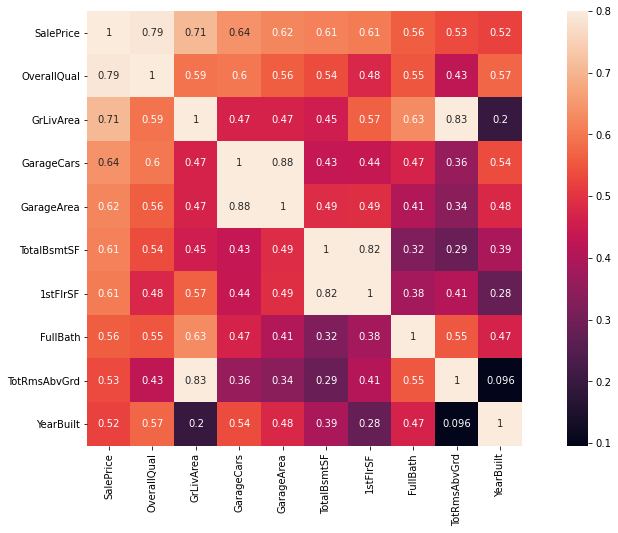

In [180]:
plt.subplots(figsize=(16,8))
data=corrmat.nlargest(10,'SalePrice').index
cm=np.corrcoef(df[data].values.T)
sns.heatmap(cm,annot=True,square=True,vmax=.8,xticklabels=data.values,yticklabels=data.values)


In [78]:
#finding the missing data

total=df.isnull().sum().sort_values(ascending=False)
percent=(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['total','percent'])
missing_data.head(20)

,total,percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [82]:
#handling the missing data
#we are cleaning the dataframe by deleting the missing data from the df and ensuring no missing data is left
md=missing_data[missing_data['total']>1]
cols=md.index
df=df.drop(cols,axis=1)

#deleting the row of the df with one column-electrical=0
df=df.drop(df.loc[df['Electrical'].isnull()].index)
df.isnull().sum().max()


0


df=df.drop(misingdata(missingdta['total']>1.index